# Signal Processing

In order to use signals for the deep-learning, we need to do preprocessing the signals. Basically, in signal processing, filters are necessary to set the frequency band. There are two types of filters. One is <code>Bandpass Filter</code> and the other is <code>Notch Filter(=band-stop filter)</code>. Before we start to learn the filters, learn about <code>Fast Fourier Transform</code> first.

<img src=./../img/code/signal-processing.png>


<b><a href = '#bandpass'>1. Bandpass Filter </a></b>
<oi>
    <li><a href= '#bandpass1'>Bandpass filter</a></li>
    <li><a href= '#lowerpass'>Lowerpass filter</a></li>
    <li><a href= '#highpass'>Highpass filter</a></li>
    <li><a href= '#bandpass2'>Other Bandpass example</a></li>
</oi>

<b><a href = '#notch'>2. Notch Filter </a></b>


<a id="bandpass"></a>
## 1. Bandpass Filter
- The goal of Bandpass-filter is to select only a part of the frequency band.
- The lower-pass filter passes only the value lower than the criteria value. On the other hand, the high-pass filter passes only the greater than criteria value. The band-pass filter passes only certain area.

All filters have different methods of handling the boundary value when passing the frequency value, but the most general method is butterworth type. When only [200-300] is passed, the boundary values are around 200 and 300. 
<img src='./../img/code/filter.png'>
When cutting frequencies using f/fo 1.0 as the cut-off criterion, it can be seen that Butterworth cuts more smoothly than Cyebyshev or Elliptic. The slower you cut, the more natural the cut. 


##### def butter_bandpass(lowcut, highcut, fs, order):
- To generate the filter coefficients for a bandpass filter, give butter() the filter order, the cutoff frequencies Wn=[lowcut, highcut], the sampling rate fs (expressed in the same units as the cutoff frequencies)  and the band type btype="band".


##### matplotlib.pyplot
- axhline(y, xmin, xmax): Displays a horizontal line along the y-axis. Enter a value between 0 and 1 as xmin, xmax values. 0 means left edge, 1 means right edge
- axvline(x, ymin, ymax): Displays a vertical line along the x-axis. Enter a value between 0 and 1 as the ymin, ymax values. 0 means bottom end, 1 means top edge
- hlines(y, xmin, xmax): Draws a horizontal line from point (xmin, y) to point (xmax, y).
- vlines(x, ymin, ymax): Draws a horizontal line from point (x, ymin) to point (x, ymax).

### Produce Z signal (synthesize 50Hz, 20Hz)

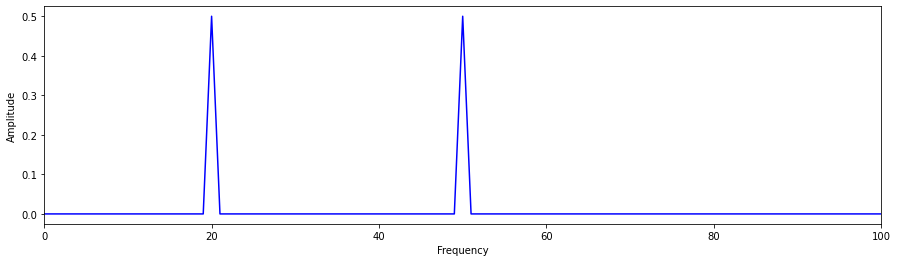

In [1]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
import numpy as np
%matplotlib inline

Fs = 2000.
Ts = 1 / Fs
te = 1.0
t = np.arange(0.0, te, Ts)

# Signal x (20Hz) + Signal y (50Hz)
x = np.cos(2 * np.pi * 20 * t)
y = np.cos(2 * np.pi * 50 * t)

# Signal z which is synthesize signal x and y
z = x + y

N = len(z)

k = np.arange(N)
T = N / Fs
freq = k / T
freq = freq[range(int(N/2))]

# Apply FFT
yfft = np.fft.fft(z)
yf = yfft / N
yf = yf[range(int(N/2))]

plt.rcParams["figure.figsize"] = (15,4)

# print FFT
plt.plot(freq, abs(yf), 'b')
plt.xlabel('Frequency')

plt.ylabel('Amplitude')
plt.xlim(0, Fs / 20)
plt.show()

<a id="bandpass1"></a>
### 1 - Bandpass Filter

Bandpass filter can extract only a partial range of frequency bands.
In this code, only the frequency band of 40 ~ 100Hz are allowed to pass.

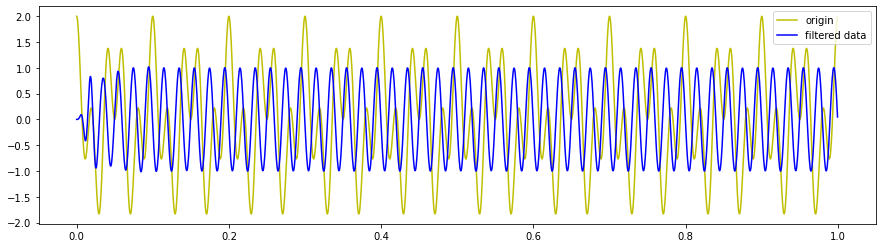

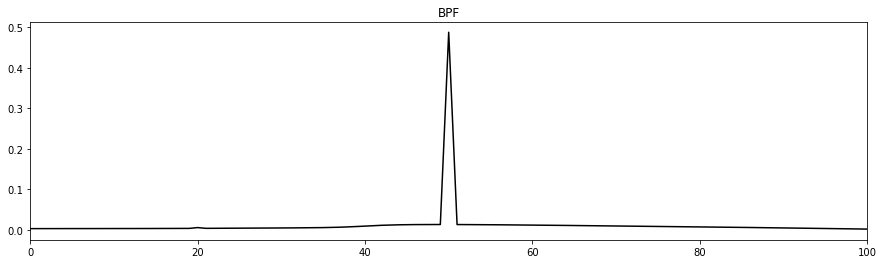

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting (Only extract frequency band between 40 ~ 100 hz)
lowcut = 40.0
highcut = 100.0
    
# BPF
yy = butter_bandpass_filter(z, lowcut, highcut, Fs, order=5)

# 1. Original Plot
plt.plot(t, z, 'y', label='origin')

# 2. Filtered Plot
plt.plot(t, yy, 'b', label='filtered data')
plt.legend()
plt.show() 
    
# 3. Filtered FFT Plot
yf = np.fft.fft(yy) / N
yf = yf[range(int(N/2))]

plt.title("BPF")
plt.plot(freq, abs(yf), 'k')
plt.xlim(0, Fs / 20)
plt.show()

<a id="lowerpass"></a>
### 2 - Low-pass Filter


Low-pass filter only passes frequencies lower than the selected cutoff frequency.
Only frequncies lower than 30Hz are paased, which means that only 0-30 Hz is drawn.

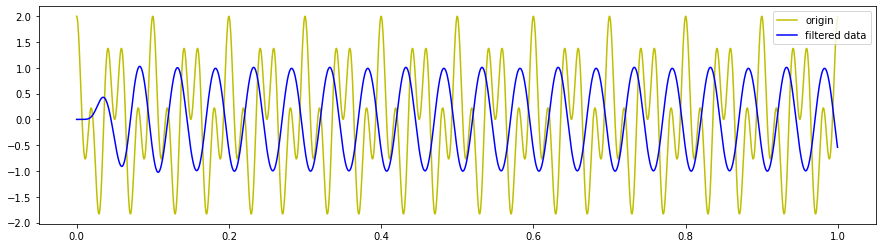

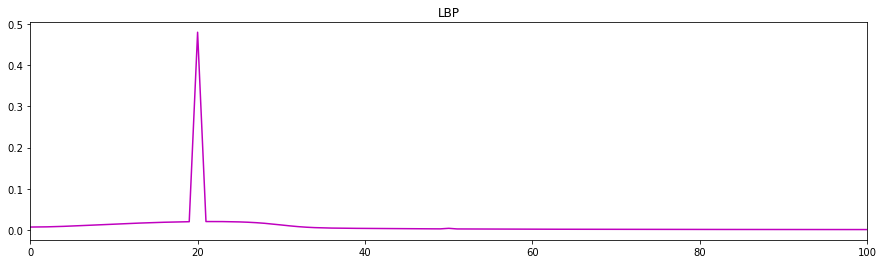

In [3]:
def butter_lowpass(cutoff, fs, order=9):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=9):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# LPF
cutoff = 30.

lpf = butter_lowpass_filter(z, cutoff, Fs, order=9)

# 1. Original signal
plt.plot(t, z, 'y', label='origin')

# 2. Filtered signal Plot
plt.plot(t, lpf, 'b', label='filtered data')
plt.legend()
plt.show() 

# 3. Filtered FFT Plot
yfft = np.fft.fft(lpf)
yf = yfft / N
yf = yf[range(int(N/2))]

plt.plot(freq, abs(yf), 'm')
plt.title("LBP")
plt.xlim(0, Fs / 20)
plt.show()

<a id="highpass"></a>
### 3 - High-pass Filter

High-pass filter only passes frequencies higher than the selected cutoff frequency.
Only frequncies higher than 50Hz are paased.

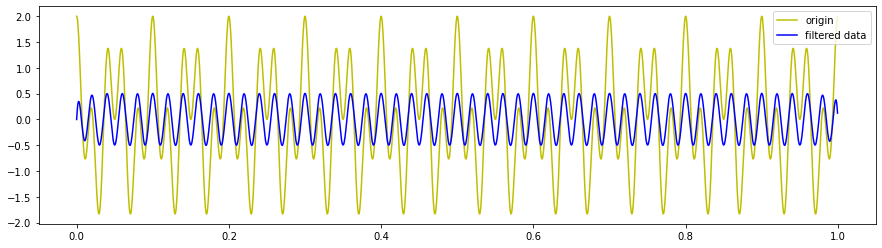

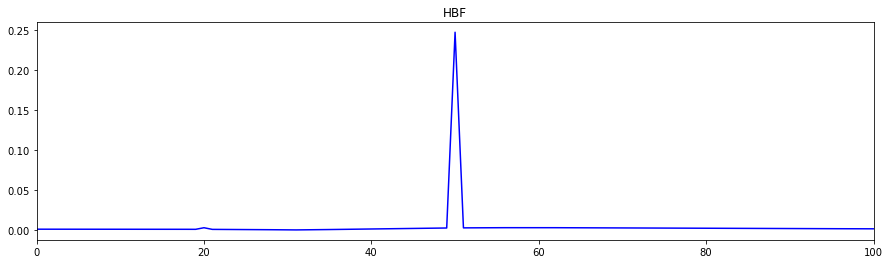

In [4]:
from scipy import signal

def butter_highpass(cutoff, fs, order=3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=3):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y


# HPF
cutoff = 50.
hpf = butter_highpass_filter(z, cutoff, Fs)

# 1. Original signal
plt.plot(t, z, 'y', label='origin')

# 2. Filtered signal Plot
plt.plot(t, hpf, 'b', label='filtered data')
plt.legend()
plt.show() 

# 3. Filtered FFT Plot
yfft = np.fft.fft(hpf)
yf = yfft / N
yf = yf[range(int(N/2))]

plt.plot(freq, abs(yf), 'b')
plt.title("HBF")
plt.xlim(0, Fs / 20)
plt.show()

<a id="bandpass2"></a>
### 4- Other Bandpass example
ref: https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html

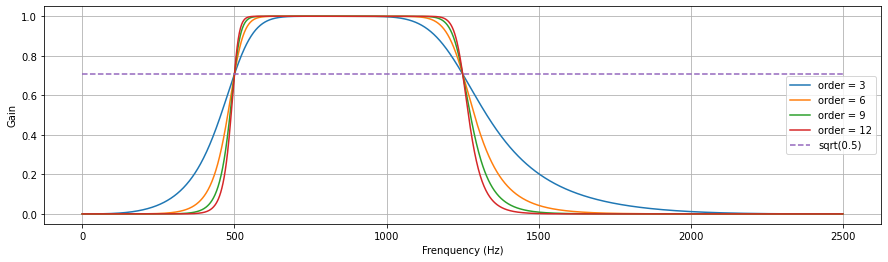

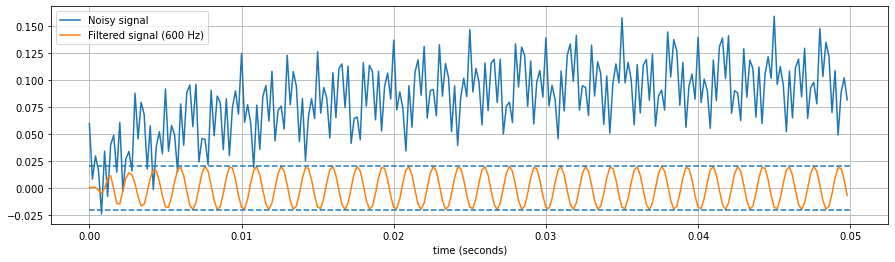

In [5]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
    
####################################################
# params 'lowcut' : desired lowest cutoff frequency (in Hz)
# params 'highcut' : desired highest cutoff frequency (in Hz)
# params 'fs' : sampling rate
# params 'order' : how sharply the frequency is cut
###################################################


def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def frequency_response_order():
    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9, 12]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, fs=fs, worN=2000)
        plt.plot(w, abs(h), label="order = %d"% order)
        
    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
    plt.xlabel('Frenquency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

def filter_noisy(lowcut, highcut, fs):
    T = 0.05
    nsamples = T * fs
    t = np.arange(0, nsamples) / fs
    a = 0.02
    f0 = 600.0
    
    # Noisy signal
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf() 
    plt.plot(t, x, label='Noisy signal')
    
    # Filtered signal using butter_bandpass_filter
    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()    
    
    
if __name__ == "__main__":  
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0

    # Show the frequency response at several filter orders
    # for the same sampling rate and cutoff frequencies.
    frequency_response_order()
    
    # Demonstrates the effect of the noise filter with order=6 
    # On a sample time series.
    filter_noisy(lowcut, highcut, fs)
    

<a id="notch"></a>
## 2. Notch filter (Band-stop filter)

As opposed to a bandpass filter, a notch filter is a band-stop filter with a narrow bandwidth (high quality factor). It rejects a narrow frequency band and leaves the rest of the spectrum little changed.

ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html

In [8]:
from scipy import signal

#######################################################################################
# params "center" : The center frequencty value that I want to delete
# params "interval" : How much to delete left and right based on the center frequency
#######################################################################################

def notch_pass_filter(data, center, interval=20, sr=44100, normalized=False):
    center = center/(sr/2) if normalized else center
    b, a = signal.iirnotch(center, center/interval, sr)
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data

# return filtered data with (1100 Hz) stopband
notch_pass_filter(t, 1100, 20, 44100, True)

array([0.        , 0.00049929, 0.00099716, ..., 0.17488398, 0.17488568,
       0.17488737])